In [278]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [279]:
class Net(nn.Module):
    def __init__(self, dim_input, hidden, dim_out):
        super(Net, self).__init__()
        
        self.linear1 = nn.Linear(dim_input, hidden)
        self.linear2 = nn.Linear(hidden, dim_out)
    
    def forward(self, x):
        x = sigmoid(self.linear1(x))
        x = sigmoid(self.linear2(x))
        return x


In [280]:
model = Net(1,2,1)

In [281]:
model.state_dict()

OrderedDict([('linear1.weight',
              tensor([[0.9170],
                      [0.4391]])),
             ('linear1.bias', tensor([ 0.0519, -0.9891])),
             ('linear2.weight', tensor([[ 0.2250, -0.2962]])),
             ('linear2.bias', tensor([0.6547]))])

In [282]:
for i, j in model.state_dict().items():
    print(i,' : ', j)

linear1.weight  :  tensor([[0.9170],
        [0.4391]])
linear1.bias  :  tensor([ 0.0519, -0.9891])
linear2.weight  :  tensor([[ 0.2250, -0.2962]])
linear2.bias  :  tensor([0.6547])


In [283]:
x = torch.tensor([0.0])
yhat = model(x)
yhat

tensor([0.6659], grad_fn=<SigmoidBackward0>)

In [284]:
X = torch.tensor([[0.0], [2.0], [3.0]])
yhat = model(X)
yhat

tensor([[0.6659],
        [0.6704],
        [0.6670]], grad_fn=<SigmoidBackward0>)

In [285]:
def train(X, Y, model, optimizer, criterion, epochs=1000):
    
    cost = []
    total = 0
    
    for epoch in range(epochs):
        total = 0
        for x, y in zip(X,Y):
            
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

            #cumulative loss
            total += loss.item()
        cost.append(total)
        print('Epoch : {} ------> cost : {}'.format(epoch, total))
    return cost

In [286]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0]).view(-1, 1).type(torch.FloatTensor)
Y[(X[:,0]>-4) & (X[:,0]<4)] = 1.0

In [287]:
print('Y : ', Y,'\nX : ',X)

Y :  tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]) 
X :  tensor([[-20.],
        [-19.],
        [-18.],
        [-17.],
        [-16.],
        [-15.],
        [-14.],
        [-13.],
        [-12.],
        [-11.],
        [-10.],
        [ -9.],
        [ -8.],
        [ -7.],
        [ -6.],
        [ -5.],
        [ -4.],
        [ -3.],
        [ -2.],
        [ -1.],
        [  0.],
        [  1.],
        [  2.],
        [  3.],
        [  4.],
        [  5.],
        [  6

<Axes: xlabel='x', ylabel='y'>

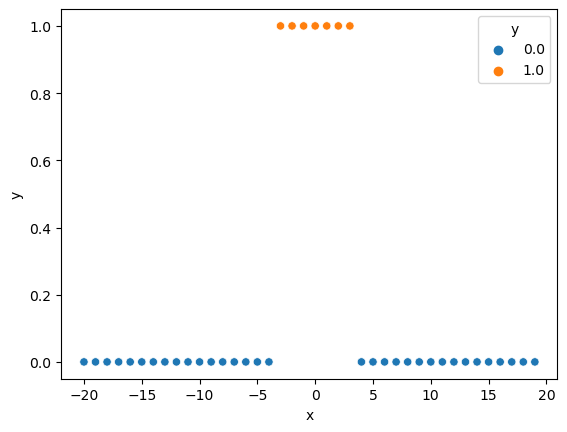

In [288]:
datas = pd.DataFrame(torch.concat((X, Y.view(-1, 1)), axis=1), columns=['x', 'y'])
sns.scatterplot(data=datas, x='x', y='y', hue='y')

In [289]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

cost = train(X=X, Y=Y, model=model, optimizer=optimizer, criterion=criterion)

Epoch : 0 ------> cost : 35.40678617358208
Epoch : 1 ------> cost : 31.361023247241974
Epoch : 2 ------> cost : 28.370635509490967
Epoch : 3 ------> cost : 26.163184583187103
Epoch : 4 ------> cost : 24.523018091917038
Epoch : 5 ------> cost : 23.29099988937378
Epoch : 6 ------> cost : 22.35356506705284
Epoch : 7 ------> cost : 21.630617827177048
Epoch : 8 ------> cost : 21.06563439965248
Epoch : 9 ------> cost : 20.61843714118004
Epoch : 10 ------> cost : 20.260151118040085
Epoch : 11 ------> cost : 19.969781935214996
Epoch : 12 ------> cost : 19.73187218606472
Epoch : 13 ------> cost : 19.534897074103355
Epoch : 14 ------> cost : 19.370170280337334
Epoch : 15 ------> cost : 19.231071397662163
Epoch : 16 ------> cost : 19.112504169344902
Epoch : 17 ------> cost : 19.010511085391045
Epoch : 18 ------> cost : 18.921986386179924
Epoch : 19 ------> cost : 18.844481453299522
Epoch : 20 ------> cost : 18.776046007871628
Epoch : 21 ------> cost : 18.715119689702988
Epoch : 22 ------> cost : 

In [290]:
yhat = model(X)

In [291]:
yhat[yhat>0.5] = 1.0
yhat[yhat<0.5] = 0.0

In [292]:
yhat

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<IndexPutBackward0>)

<Axes: xlabel='x', ylabel='y'>

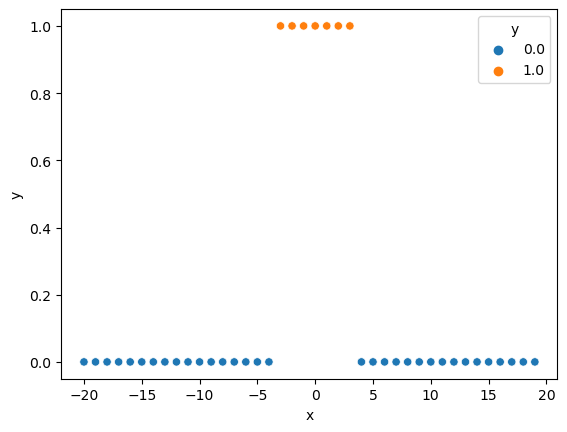

In [293]:
datas_pred = pd.DataFrame(torch.concat((X, yhat.detach()), axis=1), columns=['x', 'y'])
sns.scatterplot(data=datas, x='x', y='y', hue='y')

In [294]:
correct =0
correct = correct + (yhat == Y).sum().item()
accuracy = correct / Y.shape[0]

In [295]:
accuracy

1.0

In [296]:
X_test = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y_test = torch.zeros(X_test.shape[0]).view(-1, 1).type(torch.FloatTensor)
Y_test[(X_test[:,0]>-4) & (X_test[:,0]<4)] = 1.0

In [297]:
ytest = model(X_test)

In [298]:
ytest[yhat>0.5] = 1.0
ytest[yhat<0.5] = 0.0

In [299]:
ytest

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], grad_fn=<IndexPutBackward0>)

<Axes: xlabel='x', ylabel='y'>

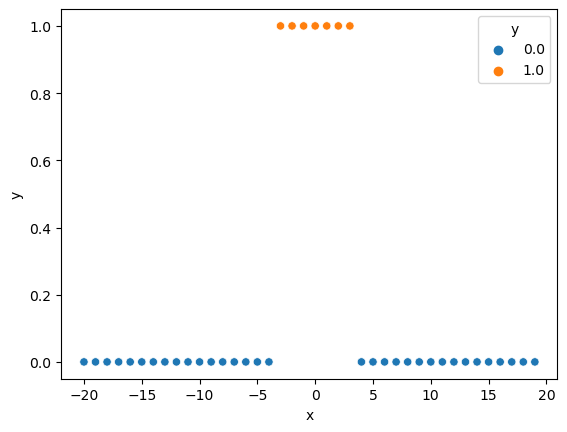

In [300]:
datas_pred = pd.DataFrame(torch.concat((X_test, ytest.detach()), axis=1), columns=['x', 'y'])
sns.scatterplot(data=datas, x='x', y='y', hue='y')

In [301]:
correct = 0
correct = correct + (ytest == Y_test).sum().item()
accuracy = correct / Y_test.shape[0]

In [302]:
accuracy

1.0